In [17]:
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Статистические методы отбора признаков
1. Задание 1: Отбор признаков с использованием корреляционных матриц.
 Для начала, используйте датасет о винах из sklearn.datasets. Найти
корреляционную матрицу для датасета и, дополнительно, визуализируйте ее с
помощью seaborn.
2. Задание 2: Отбор признаков на основе важности признаков в случайном лесе.
 Используйте тот же датасет и подгоните модель RandomForestRegressor к
вашим данным, затем используйте атрибут feature_importances_ чтобы
определить наиболее важные признаки.
3. Задание 3: Использование выбора признаков на основе p-value.
 Для этого задания можно использовать набор данных Boston Housing из
sklearn.datasets.
4. Задание 4: Отбор признаков с помощь метода взаимной информации.
 Используйте любой датасет, с которым вам приятно работать. Установите
библиотеку sklearn и примените функцию mutual_info_classif или
mutual_info_regression для отбора признаков.
5. Задание 5: Используйте метод Recursive Feature Elimination на том же датасете.
 Постройте модель, например, линейную регрессию или SVM, и используйте
RFE для выбора лучшего подмножества признаков.
6. Задание 6: Сравните различные методы отбора признаков.
Примените каждый из методов отбора признаков к одному и тому же датасету,
а затем сравните производительность моделей машинного обучения,
обученных на этих различных подмножествах признаков.


Каждое задание должно включать в себя следующие шаги: загрузка и предварительная обработка
данных, применение метода отбора признаков, обучение модели на выбранных признаках и оценка
производительности модели. Для оценки модели могут быть использованы такие метрики, как
accuracy для задач классификации и MSE для задач регрессии.
Здесь можно найти больше датасетов для этих задач:
 [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php),
 [Kaggle Datasets](https://www.kaggle.com/datasets),
 [Google's Dataset Search](https://datasetsearch.research.google.com/)

1. Задание 1: Работа с корреляционной матрицей.
Используйте набор данных "Iris" из sklearn.datasets. Вычислите
корреляционную матрицу числовых признаков. Затем визуализируйте эту
матрицу с помощью heatmap в библиотеке seaborn.


Загрузка датасета "Iris"

In [18]:
load =sklearn.datasets.load_iris()
data = pd.DataFrame(load.data, columns=load.feature_names)
data['target'] = load.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Построение корреляционной матрицы

<Axes: >

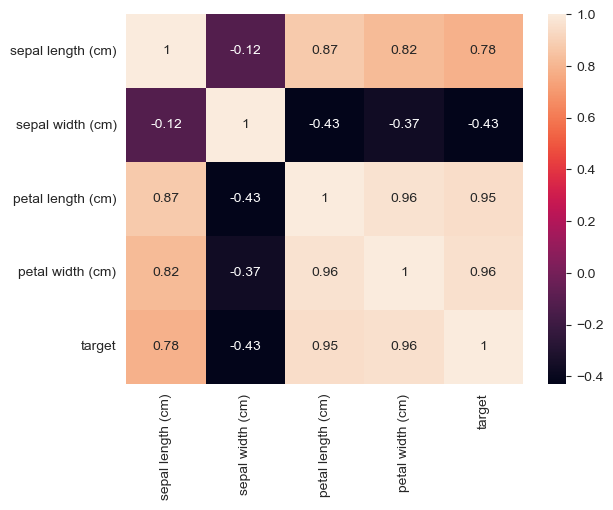

In [19]:
correlation=data.corr()
sns.heatmap(correlation, annot=True)

Из матрицы видна сильная зависимость sepal length от petal width, petal length и petal width от petal length.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
X= data.drop(columns=['target'])
Y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=43)
DEGREES = 1
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(X_train, y_train)
predictions = regression.predict(X_test)
mean_squared_error = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error: {mean_squared_error}")


Mean Squared Error: 0.03627645940883921


MSE низкий поэтому можно сказать что модель хорошо обучилась.

2. Задание 2: Исключение мультиколлинеарных признаков.
Используйте набор данных "Wine" из sklearn.datasets. Вычислите
корреляционную матрицу, а затем найдите и исключите признаки, у которых
корреляция друг с другом превышает заданный порог.


Загрузка датасета "Wine"

In [21]:
load=sklearn.datasets.load_wine()
wine = pd.DataFrame(load.data, columns=load.feature_names)
wine['target'] = load.target
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Построение матрицы

<Axes: >

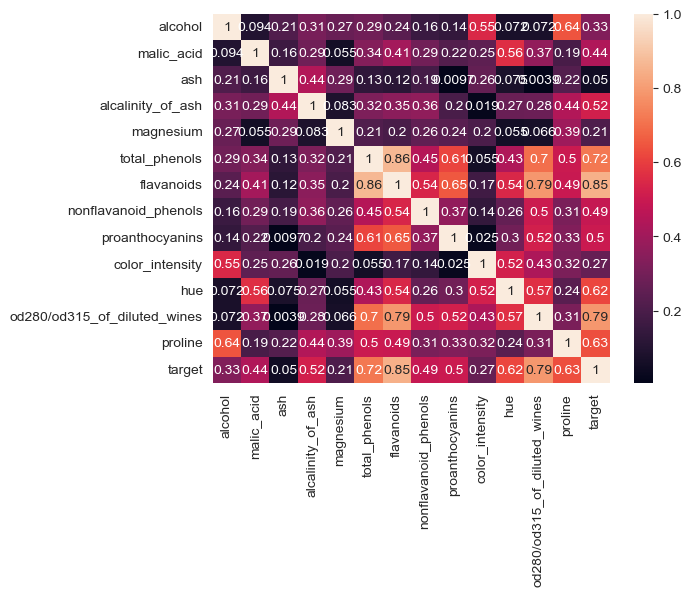

In [22]:
correlation_wine=wine.corr().abs()
sns.heatmap(correlation_wine, annot=True)

Т.к. матрица слишком большая удалим признаки при помощи функции где будем задавать порог корреляции.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.53,1.46,9.30,0.60,1.62,840.0,2


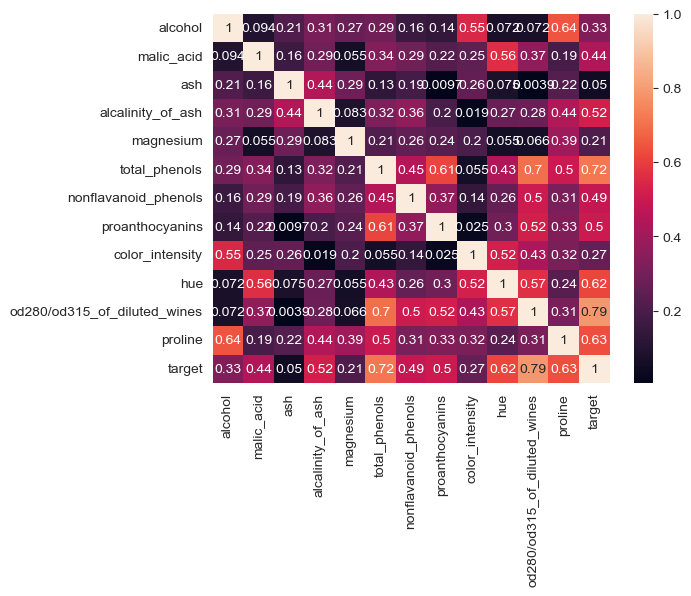

In [23]:
threshold = 0.8
upper = np.triu(np.ones(correlation_wine.shape), k=1)
to_drop = set()
for i in range(len(correlation_wine.columns)):
    for j in range(i + 1, len(correlation_wine.columns)):
        if correlation_wine.iloc[i, j] > threshold:
            colname = correlation_wine.columns[j]
            to_drop.add(colname)
to_drop.discard('target')
# Новый датасет без мультиколлинеарных признаков
wine = wine.drop(columns=to_drop)

correlation_wine=wine.corr().abs()
sns.heatmap(correlation_wine, annot=True)
wine

Из графика видно-что коррелирующих признаков не наблюдается

Построение модели линейной регрессии

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
X= wine.drop(columns=['target'])
Y = wine['target']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=43)
DEGREES = 1
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(X_train, y_train)
predictions = regression.predict(X_test)
mean_squared_error = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error: {mean_squared_error}")


Mean Squared Error: 0.07334881695079735


MSE достаточно низкий поэтому можно сказать что модель хорошо обучена.

3. Задание 3: Выбор наиболее значимых признаков.
Используйте набор данных "Boston Housing" из sklearn.datasets. Вычислите
коэффициенты корреляции между каждым признаком и целевой переменной,
затем выберите n признаков с наибольшим абсолютным значением
коэффициента.

Загрузка датасета. Вычисляем корреляцию, сортируем и выбираем пять лучших.

In [25]:
load = sklearn.datasets.fetch_california_housing()
boston = pd.DataFrame(load.data, columns=load.feature_names)
boston['target']=load.target
# Вычисление коэффициентов корреляции
correlations = boston.drop('target',axis=1).corrwith(boston['target']).abs()

# Выбор n наиболее значимых признаков
n = 5
important_features = correlations.nlargest(n).index.tolist()

print("Наиболее значимые признаки:", important_features)
boston

Наиболее значимые признаки: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Строим модель.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
X= boston.loc[:, important_features]
Y = boston['target']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=43)
DEGREES = 1
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(X_train, y_train)
predictions = regression.predict(X_test)
mean_squared_error = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error: {mean_squared_error}")

Mean Squared Error: 0.5863834408609571


Довольно высокое MSE, может быть связано с переобучением или плохим качеством данных и выбранных признаков.

4. Задание 4: Применение Ранговой корреляции Спирмена.
Используйте любой набор данных, имеющий порядковые признаки.
Примените корреляцию Спирмена для выбора наиболее значимых признаков.

Загружаем датасет о винах. Вычисляем корреляцию Спирмена и строим график.

C:\Users\perzh\AppData\Local\Temp\ipykernel_35588\1000584099.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spearman Correlation', y='Feature', data=corr_df, palette='coolwarm')


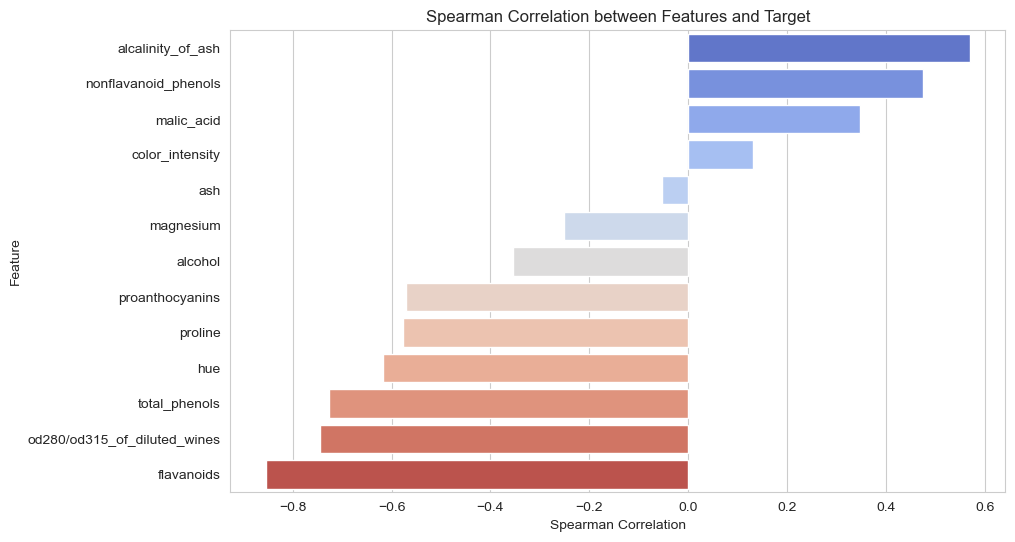

In [27]:
from scipy.stats import spearmanr

# Загружаем датасет
data = sklearn.datasets.load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
data=X+Y
# Вычисление корреляции Спирмена между признаками и целевой переменной
correlations = []
for column in X.columns:
    corr, _ = spearmanr(X[column], y)
    correlations.append((column, corr))

# Преобразуем список в DataFrame для удобства
corr_df = pd.DataFrame(correlations, columns=['Feature', 'Spearman Correlation'])

# Сортируем по значению корреляции
corr_df = corr_df.sort_values(by='Spearman Correlation', ascending=False)

# Визуализация с помощью Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Spearman Correlation', y='Feature', data=corr_df, palette='coolwarm')
plt.title("Spearman Correlation between Features and Target")
plt.xlabel('Spearman Correlation')
plt.ylabel('Feature')
plt.show()


Из графика видно-что большинство признаков сильно коррелируют с target 

Отбираем 5 признаков и строим модель Наивного Байеса.

In [28]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


# Применение отбора признаков (top 5)
top_5_features = corr_df.head(5)['Feature'].tolist()
X_selected = X[top_5_features]

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=43)

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(predictions, y_test)
print(f"Точность модели на тестовом участке = {accuracy}")


Точность модели на тестовом участке = 0.8888888888888888


Точность достаточно высокая

5. Задание 5: Сравнение методов отбора признаков.
Используйте один и тот же набор данных для применения различных
методов отбора признаков, включая корреляционные методы, и сравните
результаты.

D:\anaconda3\envs\lab1\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


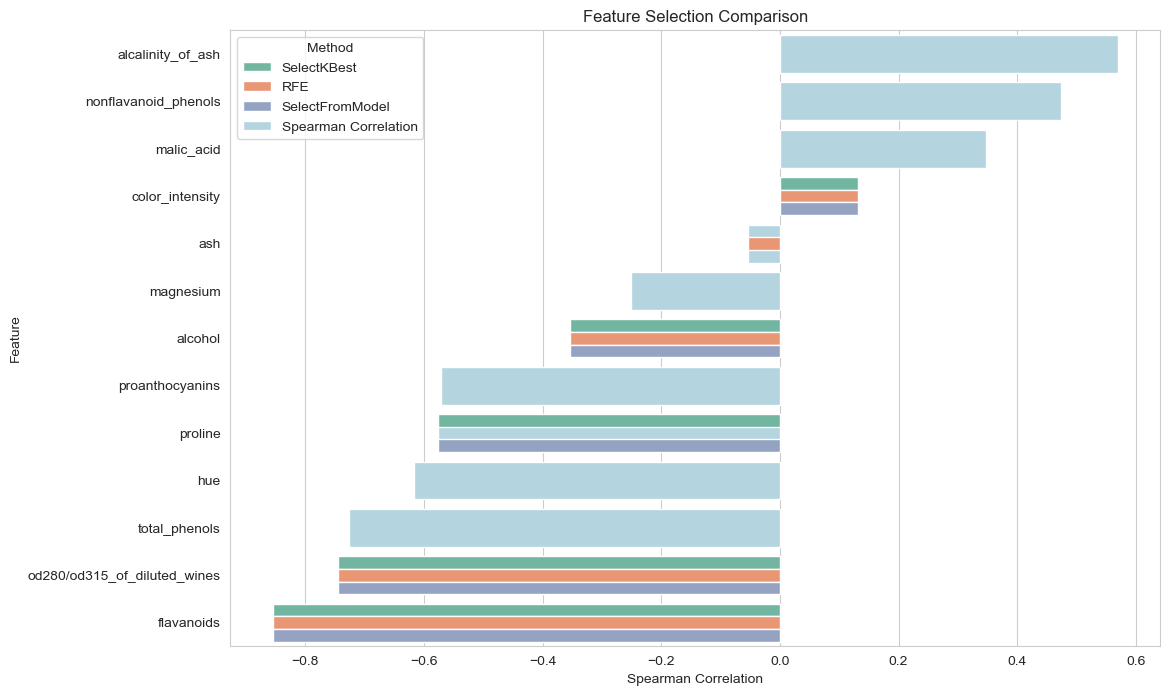

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

# Загружаем данные
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Корреляционный метод (Spearman)
correlations = []
for column in X.columns:
    corr, _ = spearmanr(X[column], y)
    correlations.append((column, corr))

# Сортировка по корреляции
corr_df = pd.DataFrame(correlations, columns=['Feature', 'Spearman Correlation'])
corr_df = corr_df.sort_values(by='Spearman Correlation', ascending=False)

# 2. SelectKBest (метод на основе статистики ANOVA F-статистики)
selector_kbest = SelectKBest(f_classif, k=5)
X_kbest = selector_kbest.fit_transform(X_train, y_train)
selected_kbest = X.columns[selector_kbest.get_support()]
kbest_df = pd.DataFrame({'Feature': selected_kbest, 'Method': 'SelectKBest'})

# 3. Рекурсивный отбор признаков (RFE) с логистической регрессией
rfe_selector = RFE(LogisticRegression(max_iter=10000), n_features_to_select=5)
X_rfe = rfe_selector.fit_transform(X_train, y_train)
selected_rfe = X.columns[rfe_selector.get_support()]
rfe_df = pd.DataFrame({'Feature': selected_rfe, 'Method': 'RFE'})

# 4. Отбор признаков с использованием модели (например, RandomForest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
sfm = SelectFromModel(model, threshold="mean", max_features=5)
X_sfm = sfm.transform(X_train)
selected_sfm = X.columns[sfm.get_support()]
sfm_df = pd.DataFrame({'Feature': selected_sfm, 'Method': 'SelectFromModel'})

# Объединяем результаты всех методов в один DataFrame
all_selected_features = pd.concat([kbest_df, rfe_df, sfm_df])
all_selected_features = pd.merge(all_selected_features, corr_df[['Feature', 'Spearman Correlation']], on='Feature')

# Визуализация с помощью Seaborn
plt.figure(figsize=(12, 8))

# График для корреляций Спирмена
sns.barplot(x='Spearman Correlation', y='Feature', data=corr_df, color='lightblue', label='Spearman Correlation')

# График для методов отбора признаков
sns.barplot(x='Spearman Correlation', y='Feature', data=all_selected_features, hue='Method', palette='Set2')

# Настройки графика
plt.title("Feature Selection Comparison")
plt.xlabel('Spearman Correlation')
plt.ylabel('Feature')
plt.legend(title='Method')
plt.show()


Results for SelectKBest:
1.0
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36.0}
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36.0}


Results for RFE:
1.0
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36.0}
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36.0}


Results for SelectFromModel:
1.0
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36.0}
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36.0}




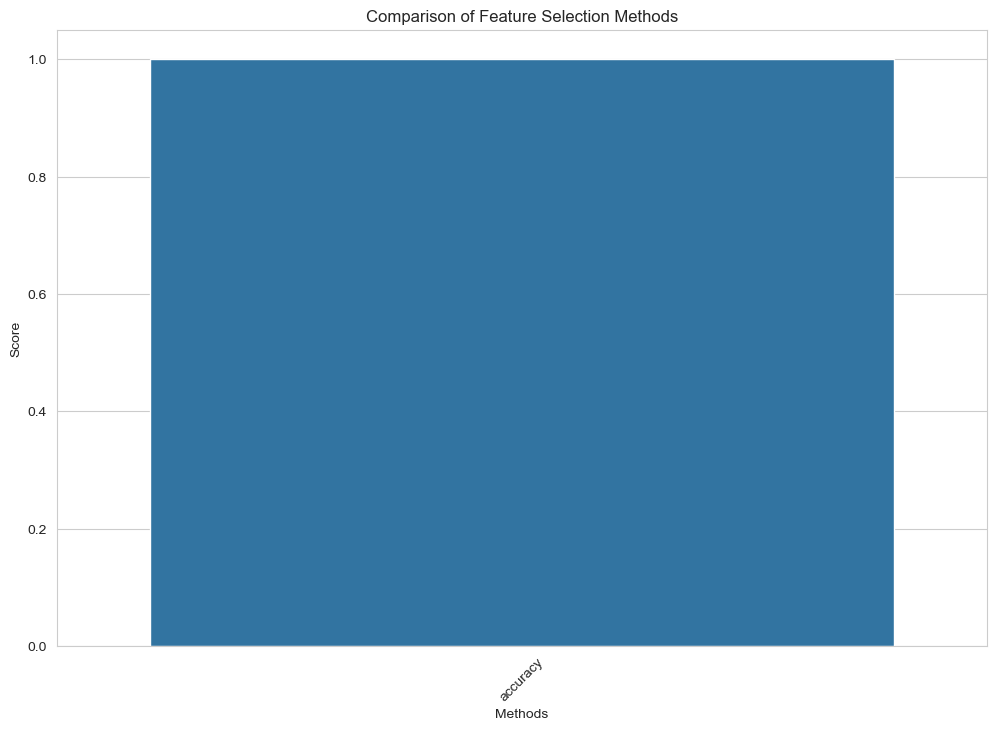

'plt.figure(figsize=(12, 8))\nsns.barplot(x=\'Spearman Correlation\', y=\'Feature\', data=corr_df, color=\'lightblue\')\nplt.title("Spearman Correlation between Features and Target")\nplt.xlabel(\'Spearman Correlation\')\nplt.ylabel(\'Feature\')\nplt.show()'

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr

# Шаг 1: Загрузка и предварительная обработка данных
data = load_wine()  # Загружаем датасет
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные (для моделей, чувствительных к масштабу)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг 2: Применение методов отбора признаков

# 1. Корреляционный метод (Spearman)
correlations = []
for column in X.columns:
    corr, _ = spearmanr(X[column], y)
    correlations.append((column, corr))

# Сортировка по корреляции
corr_df = pd.DataFrame(correlations, columns=['Feature', 'Spearman Correlation'])
corr_df = corr_df.sort_values(by='Spearman Correlation', ascending=False)

# 2. SelectKBest (ANOVA F-статистика)
selector_kbest = SelectKBest(f_classif, k=5)
X_kbest = selector_kbest.fit_transform(X_train_scaled, y_train)
selected_kbest = X.columns[selector_kbest.get_support()]

# 3. Рекурсивный отбор признаков (RFE) с логистической регрессией
rfe_selector = RFE(LogisticRegression(max_iter=10000), n_features_to_select=5)
X_rfe = rfe_selector.fit_transform(X_train_scaled, y_train)
selected_rfe = X.columns[rfe_selector.get_support()]

# 4. Отбор признаков с использованием модели (RandomForest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
sfm = SelectFromModel(model, threshold="mean", max_features=5)
X_sfm = sfm.transform(X_train_scaled)
selected_sfm = X.columns[sfm.get_support()]

# Шаг 3: Обучение модели на выбранных признаках
# Логистическая регрессия для всех методов отбора

# Модели для обучения
models = {
    'SelectKBest': SelectKBest(f_classif, k=5).fit(X_train_scaled, y_train),
    'RFE': RFE(LogisticRegression(max_iter=10000), n_features_to_select=5).fit(X_train_scaled, y_train),
    'SelectFromModel': sfm.fit(X_train_scaled, y_train)
}

# Обучаем модели и оцениваем производительность
def evaluate_model(X_train, X_test, y_train, y_test, feature_selector):
    X_train_selected = feature_selector.transform(X_train)
    X_test_selected = feature_selector.transform(X_test)

    # Логистическая регрессия
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_selected, y_train)

    # Предсказания и оценка
    y_pred = model.predict(X_test_selected)
    return classification_report(y_test, y_pred, output_dict=True)

# Оценка производительности для каждого метода
results = {}
for method, feature_selector in models.items():
    results[method] = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, feature_selector)

# Шаг 4: Оценка производительности модели
# Визуализация результатов
for method, result in results.items():
    print(f"Results for {method}:")
    print(result['accuracy'])
    print(result['macro avg'])
    print(result['weighted avg'])
    print("\n")

# Визуализация с помощью Seaborn
all_results = pd.DataFrame(results).T
all_results = all_results[['accuracy', 'macro avg', 'weighted avg']]

# Построение графиков
plt.figure(figsize=(12, 8))
sns.barplot(data=all_results)
plt.title("Comparison of Feature Selection Methods")
plt.ylabel('Score')
plt.xlabel('Methods')
plt.xticks(rotation=45)
plt.show()

# Визуализация корреляций
"""plt.figure(figsize=(12, 8))
sns.barplot(x='Spearman Correlation', y='Feature', data=corr_df, color='lightblue')
plt.title("Spearman Correlation between Features and Target")
plt.xlabel('Spearman Correlation')
plt.ylabel('Feature')
plt.show()"""


Все модели хорошо обучены связано это может быть сильным запоминанием всех результатов

6. Задание 6: Исследование влияния предобработки данных на результаты
корреляционного анализа.
Примените различные методы предобработки (например, нормализацию,
стандартизацию, логарифмирование) к данным перед вычислением
корреляции и сравните полученные результаты.

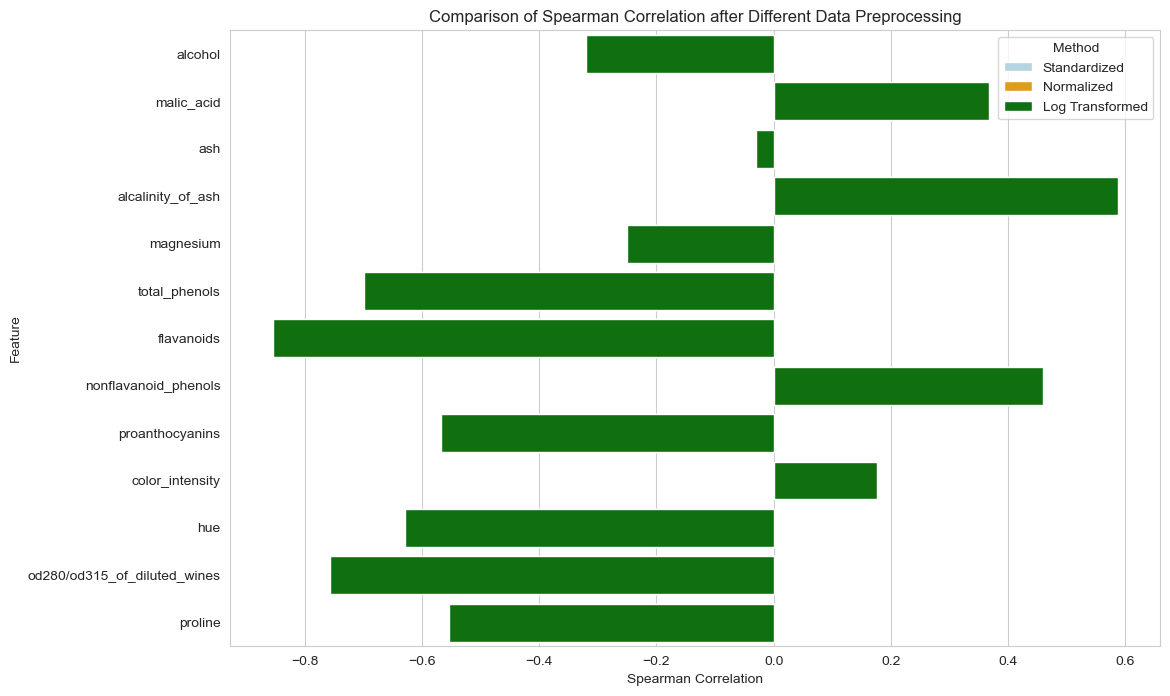

Performance with Standardization:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Performance with Normalization:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Performance with Log Transformation:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.91 

D:\anaconda3\envs\lab1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\envs\lab1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.datasets import load_wine

# Шаг 1: Загрузка и предварительная обработка данных
data = load_wine()  # Загружаем Wine dataset
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение различных методов предобработки
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Стандартизация
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

# Нормализация
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)

# Логарифмирование (для признаков, которые содержат только положительные значения)
X_train_log_transformed = np.log1p(X_train)
X_test_log_transformed = np.log1p(X_test)

# Шаг 2: Применение метода корреляции (Spearman)
def calculate_spearman_corr(X, y):
    correlations = []
    for column in X.columns:
        corr, _ = spearmanr(X[column], y)
        correlations.append((column, corr))
    return pd.DataFrame(correlations, columns=['Feature', 'Spearman Correlation'])

# Вычисляем корреляцию для различных методов предобработки
corr_standardized = calculate_spearman_corr(pd.DataFrame(X_train_standardized, columns=X.columns), y_train)
corr_normalized = calculate_spearman_corr(pd.DataFrame(X_train_normalized, columns=X.columns), y_train)
corr_log_transformed = calculate_spearman_corr(pd.DataFrame(X_train_log_transformed, columns=X.columns), y_train)

# Шаг 3: Сравнение результатов корреляции
plt.figure(figsize=(12, 8))

# Построение графиков для сравнения
sns.barplot(x='Spearman Correlation', y='Feature', data=corr_standardized, color='lightblue', label='Standardized')
sns.barplot(x='Spearman Correlation', y='Feature', data=corr_normalized, color='orange', label='Normalized')
sns.barplot(x='Spearman Correlation', y='Feature', data=corr_log_transformed, color='green', label='Log Transformed')

# Настройки графика
plt.title("Comparison of Spearman Correlation after Different Data Preprocessing")
plt.xlabel('Spearman Correlation')
plt.ylabel('Feature')
plt.legend(title='Method')
plt.show()

# Шаг 4: Оценка производительности модели (если необходимо)
# Функция для обучения модели и оценки
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

# Оценка производительности для каждого метода предобработки
print("Performance with Standardization:")
print(evaluate_model(X_train_standardized, X_test_standardized, y_train, y_test))

print("\nPerformance with Normalization:")
print(evaluate_model(X_train_normalized, X_test_normalized, y_train, y_test))

print("\nPerformance with Log Transformation:")
print(evaluate_model(X_train_log_transformed, X_test_log_transformed, y_train, y_test))


Как можно заметить результаты при Стандартизации и Нормализации одинаковые когда логарифмирования хуже, это связано с тем, что Стандартизация и Нормализация сжимают значение сохраняя их свойства, а логарифмирование изменяет также корреляцию и другие свойства.

In [32]:
"""corr_standardized['Method'] = 'Standardized'
corr_normalized['Method'] = 'Normalized'
corr_log_transformed['Method'] = 'Log Transformed'

# Объединяем все данные
corr_combined = pd.concat([corr_standardized, corr_normalized, corr_log_transformed])

# Построение одного графика с разделением по методу предобработки
plt.figure(figsize=(12, 8))
sns.barplot(x='Spearman Correlation', y='Feature', hue='Method', data=corr_combined)

plt.title("Comparison of Spearman Correlation after Different Data Preprocessing")
plt.xlabel('Spearman Correlation')
plt.ylabel('Feature')
plt.legend(title='Method')
plt.show()"""

'corr_standardized[\'Method\'] = \'Standardized\'\ncorr_normalized[\'Method\'] = \'Normalized\'\ncorr_log_transformed[\'Method\'] = \'Log Transformed\'\n\n# Объединяем все данные\ncorr_combined = pd.concat([corr_standardized, corr_normalized, corr_log_transformed])\n\n# Построение одного графика с разделением по методу предобработки\nplt.figure(figsize=(12, 8))\nsns.barplot(x=\'Spearman Correlation\', y=\'Feature\', hue=\'Method\', data=corr_combined)\n\nplt.title("Comparison of Spearman Correlation after Different Data Preprocessing")\nplt.xlabel(\'Spearman Correlation\')\nplt.ylabel(\'Feature\')\nplt.legend(title=\'Method\')\nplt.show()'